In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io

import filters
import homography
import my_types
import rectification
import utils

# Input Files

In [4]:
DATA = Path("data")
OUTDIR = Path("output")

In [31]:
name  = "car"

im1_name = DATA / (name + "1.jpg")
im2_name = DATA / (name + "2.jpg")
im3_name = DATA / (name + "3.jpg")

In [32]:
plane_name = DATA / (name + "_plane.pkl")

warp1_name = DATA / (im1_name.stem + "_w.jpg")
warp2_name = DATA / (im2_name.stem + "_w.jpg")
warp3_name = DATA / (im3_name.stem + "_w.jpg")

pts1_name = DATA / (im1_name.stem + "_w.pkl")
pts2_name = DATA / (im2_name.stem + "_w.pkl")
pts3_name = DATA / (im3_name.stem + "_w.pkl")

In [33]:
mosaic_name = OUTDIR / (name + "_mosaic.jpg")

# Pick Correspondences

In [34]:
im1 = utils.read_img(im1_name)
im2 = utils.read_img(im2_name)
im3 = utils.read_img(im3_name)

FileNotFoundError: No such file: '/Users/aprilsin/GitHub/cs194-proj5/data/car3.jpg'

In [9]:
try:
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
except:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 4)
    im2_pts = utils.pick_points(im2_name, 4)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    %matplotlib inline

In [10]:
im1_pts = im1_pts[:4]
im2_pts = im2_pts[:4]

In [11]:
h, w, c = im1.shape

num_pixels = 1600 * 1600
RESIZE = h * w > num_pixels

print(f"{RESIZE = }")
if RESIZE:
    r =  int(h * w / num_pixels)
    print("ratio = ", r)
    print("input shape = ", im1.shape)
    print("target shape = ", h / r, w / r)

RESIZE = False


In [21]:
if RESIZE:
    print("resizing...")
    im1 = sk.transform.resize(im1, (im1.shape[0] // r, im1.shape[1] // r), anti_aliasing=True)
    im2 = sk.transform.resize(im2, (im2.shape[0] // r, im2.shape[1] // r), anti_aliasing=True)
    im1_pts /= r
    im2_pts /= r

im1.shape

(750, 1000, 3)

# Image Rectification

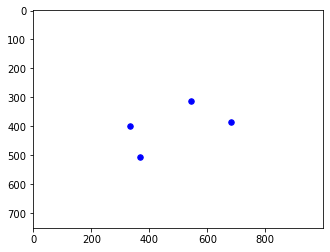

In [22]:
try:
    plane_pts = utils.load_points(plane_name)
except:
    %matplotlib tk
    plane_pts = utils.pick_points(im1, 4)
    %matplotlib inline
    # plane_pts = (im1_pts + im2_pts) / 2
    utils.save_points(plane_pts, plane_name)

if RESIZE:
    plane_pts /= r

canvas = np.ones_like(im1)
utils.plot_pts(canvas, plane_pts)

# Warp image 1 and 3 to image 2

In [ ]:
try:
    warp1 = utils.read_img(warp1_name)
    warp_pts1 = utils.load_points(pts1_name)

except:
    print("warping...")

    h_matrix1 = homography.homo_matrix(im1_pts, plane)
    warp1, shift_pts1 = homography.inverse_warp(im1, h_matrix1)
    warp_pts1 = homography.warp_pts(im1_pts, h_matrix1, shift_pts1)
    
    plt.imsave(warp1_name, warp1)
    utils.save_points(warp_pts1, pts1_name)

utils.plot_pts(warp1, warp_pts1)

# Warping to the same plane

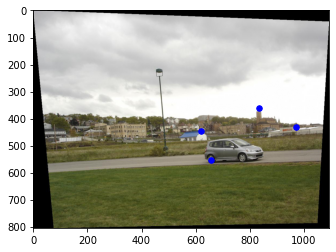

In [30]:
try:
    warp1 = utils.read_img(warp1_name)
    warp_pts1 = utils.load_points(pts1_name)

except:
    print("warping...")

    h_matrix1 = homography.homo_matrix(im1_pts, plane)
    warp1, shift_pts1 = homography.inverse_warp(im1, h_matrix1)
    warp_pts1 = homography.warp_pts(im1_pts, h_matrix1, shift_pts1)
    
    plt.imsave(warp1_name, warp1)
    utils.save_points(warp_pts1, pts1_name)

utils.plot_pts(warp1, warp_pts1)

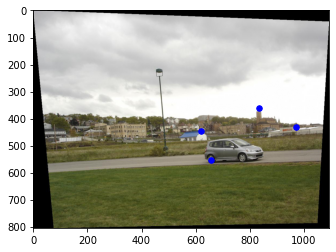

In [24]:
try:
    warp2 = utils.read_img(warp2_name)
    warp_pts2 = utils.load_points(pts2_name)

except:
    print("warping...")
    
    h_matrix2 = homography.homo_matrix(im2_pts, plane_pts)
    warp2, shift_pts2= homography.inverse_warp(im2, h_matrix2)
    warp_pts2 = homography.warp_pts(im2_pts, h_matrix2, shift_pts2)

    plt.imsave(warp2_name, warp2)
    utils.save_points(warp_pts2, pts2_name)

utils.plot_pts(warp1, warp_pts1)

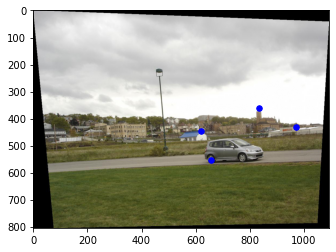

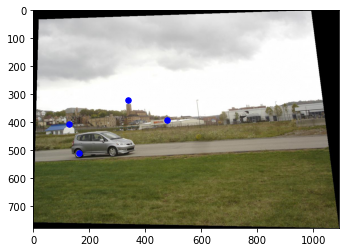

In [25]:
utils.plot_pts(warp1, warp_pts1)
utils.plot_pts(warp2, warp_pts2)

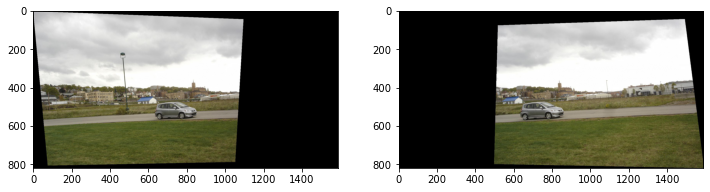

In [26]:
aligned1, aligned2 = rectification.align(warp1, warp2, warp_pts1, warp_pts2)
utils.show_two(aligned1, aligned2)

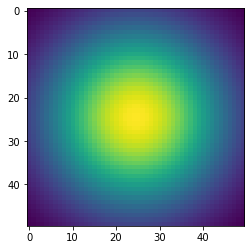

In [27]:
g = filters.gaussian_filter()
plt.imshow(g)

In [28]:
blended = rectification.average_blend(aligned1, aligned2)

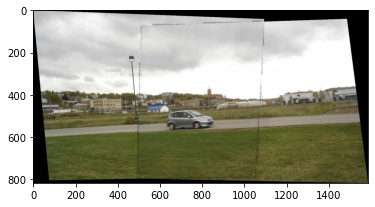

In [29]:
plt.imshow(blended)
plt.imsave(mosaic_name, blended)